## Librerías

In [1]:
%load_ext autoreload

In [2]:
%reload_ext autoreload

In [3]:
%autoreload 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
import warnings
from keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings('ignore')

## Análisis Exploratorio

Se define la ruta donde se encuentran las imagenes y se carga el archivo csv con el nombre de las imagenes y su etiqueta

In [5]:
path = "C:\\Users\\PC\\Documents\\Bajwa Hospital (Multi Eye Disease Dataset)\\"
df_images = pd.read_csv(path + "\dataset.csv",
                        sep=";")

Muestra

In [6]:
df_images.head()

,source,target
0,cataract_001.png,2
1,cataract_002.png,2
2,cataract_003.png,2
3,cataract_004.png,2
4,cataract_005.png,2


Se revisa el balanceo de las muestras por clase

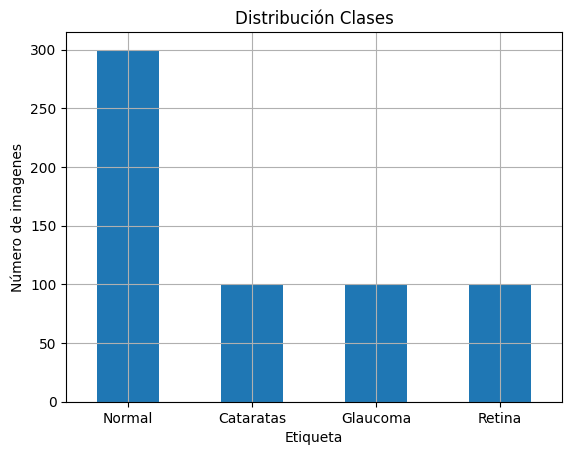

In [7]:
grf.graph_target(df_images)

Graficamos muestras aleatorias de las imagenes

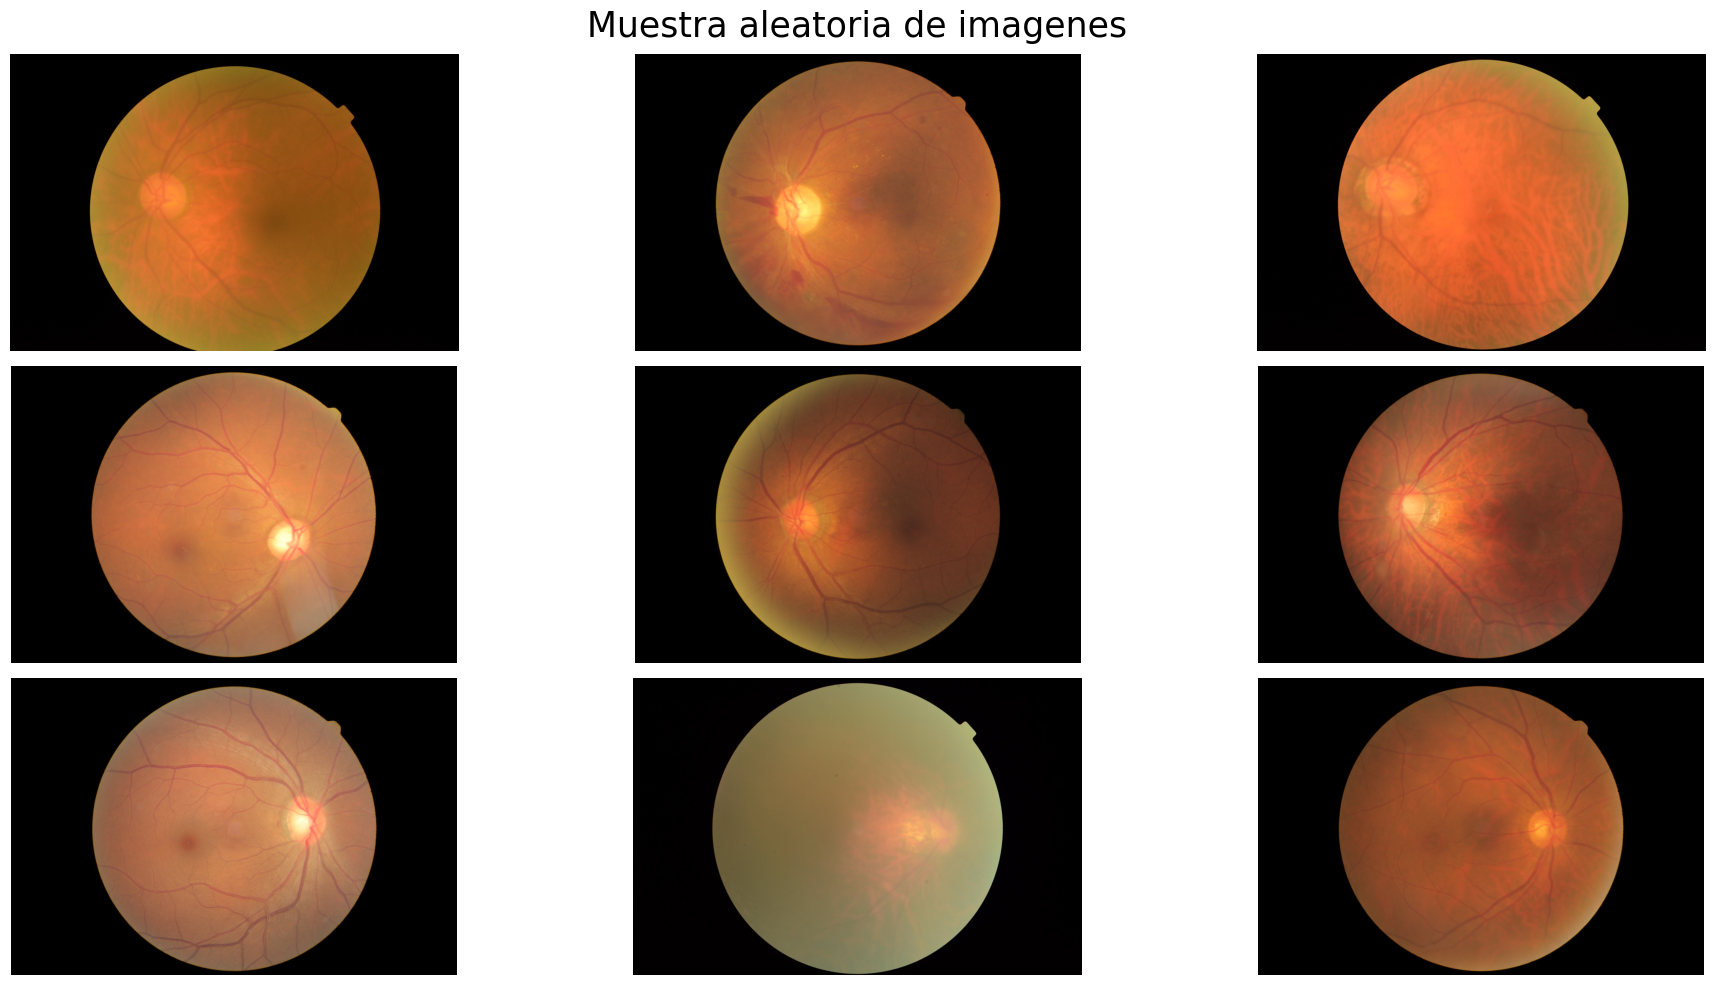

In [8]:
grf.random_samples(df_images,path)

Dimensiones e intesidad de una imagen aleatoria del dataset

Las dimensiones de la imagen son 1728 pixeles de alto y 2592 pixeles de ancho, un solo canal
El maximo valor de intensidad de un pixel es 1.0000 y el minimo valor de intensidad es 0.0000
El valor promedio de la intesidad de los pixeles es 0.2233 y la desviacion estandar de la intensidad es 0.2652


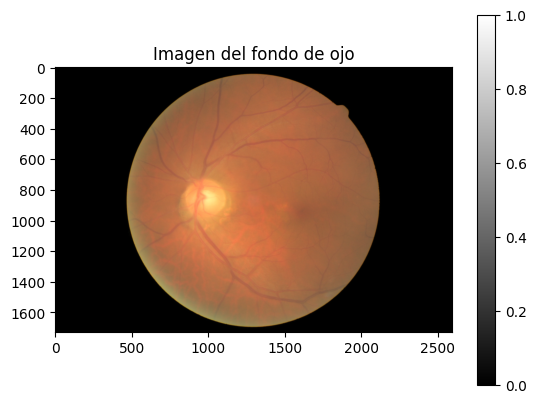

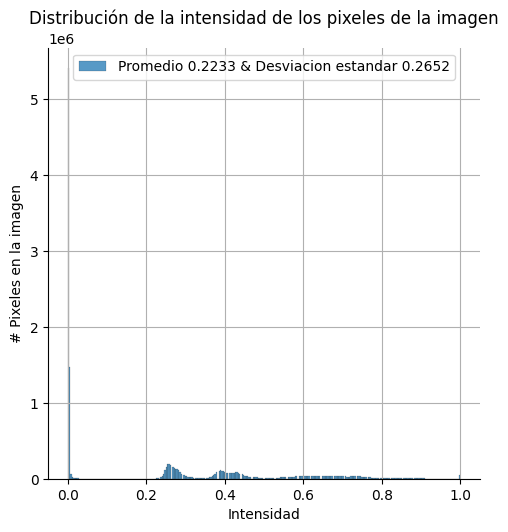

In [9]:
grf.describe_image(df_images,path)

## Preprocesamiento

Estandarización Z

In [10]:
image_generator = ImageDataGenerator(
    samplewise_center = True, 
    samplewise_std_normalization = True 
)

In [11]:
generator = image_generator.flow_from_dataframe(
        dataframe = df_images,
        directory = path,
        x_col = "source", 
        y_col = 'target', 
        class_mode = "raw", 
        batch_size = 1, 
        shuffle = False, 
        target_size = (1728,2592) 
)

Found 600 validated image filenames.


In [12]:
generated_image, label = generator.__getitem__(0)

Dimensiones e intesidad de una imagen estandarizada del dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Las dimensiones de la imagen son 1728 pixeles de alto y 2592 pixeles de ancho, un solo canal
El maximo valor de intensidad de un pixel es 2.9288 y el minimo valor de intensidad es -0.8419
El valor promedio de la intesidad de los pixeles es -0.0000 y la desviacion estandar de la intensidad es 1.0000


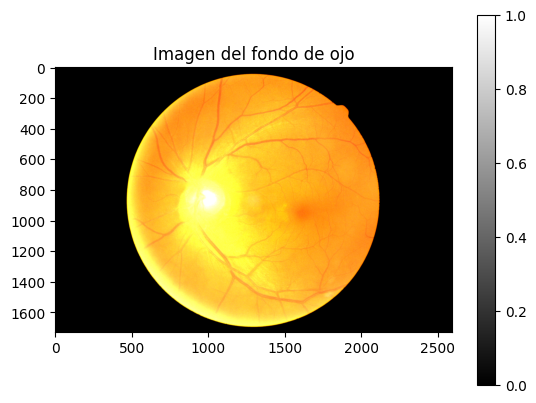

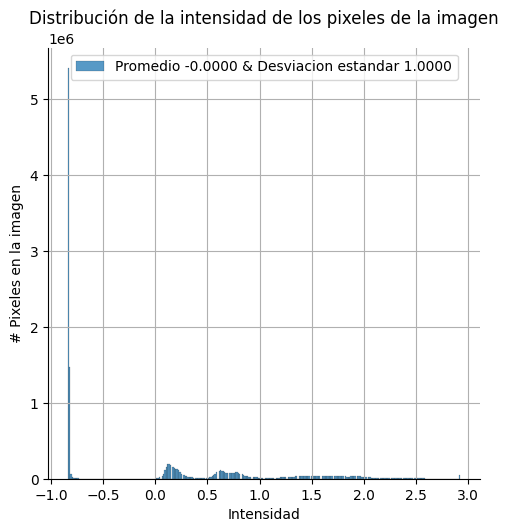

In [13]:
grf.describe_image(generated_image,path,flag_raw=False)

Distribución de intensidades de una imagen del dataset en su forma original vs su forma estandarizada

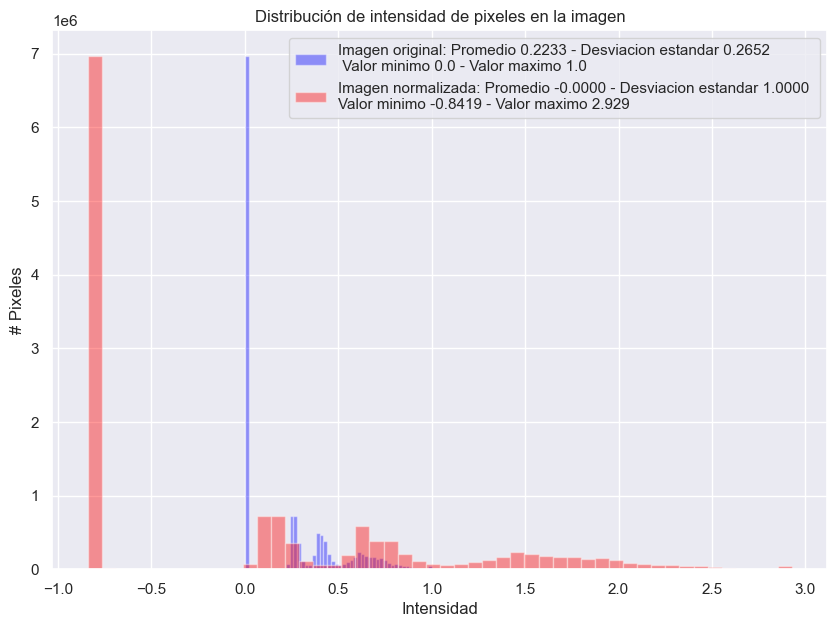

In [14]:
grf.raw_vs_std(df_images,path,generated_image)